# Bigmart Sales Data Analysis Project

Problem Statement 1 :Find the city that have maximum order.

Problem Statement 2 :Finding the time at which sales of product purchase is maximum.

Problem Statement 3 :Find the product that is being sold the most and find the reason why it is being sold most.

Problem Statement 4 :What product are most often sold together

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

# Preparation of data

(First combining all datasets and then reading the common datasets file)

In [2]:
os.listdir('F:\Plots\Project 1 datset')
files = [file for file in os.listdir('F:\Plots\Project 1 datset')]
for file in files: #putting all directories in 'files' list
      print(file)

all_data.csv
Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [3]:
path = 'F:\Plots\Project 1 datset'
all_data=pd.DataFrame()
for file in files:
    current_df=pd.read_csv(path+"/"+file)
    all_data= pd.concat([all_data,current_df])
all_data.to_csv('F:\Plots\Project 1 datset/all_data.csv', index=False)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [4]:
all_data.isnull().sum()
all_data=all_data.dropna(how ='all')
all_data.shape

(1874696, 6)

In [5]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


(Step 2: Extracting month from 'Order Date' and then adding it to dataframe)

In [6]:
'09/17/19 14:44'.split('/')[0]
def month(x):
    return x.split('/')[0]
all_data['Month']=all_data['Order Date'].apply(month)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",09
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",09
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",09
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",09
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",09


In [7]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [8]:
all_data['Month'].unique()  #order date is not converting 

array(['09', '10', 'Order Date', '04', '05', '08', '12', '01', '02', '03',
       '07', '06', '11'], dtype=object)

In [9]:
filter=all_data['Month']=='Order Date'
all_data=all_data[-filter]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",09
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",09
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",09
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",09
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",09


In [10]:
all_data['Month']=all_data['Month'].astype(int)
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [11]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)
all_data['Price Each']=all_data['Price Each'].astype(float)
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [12]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
#all_data.drop('Quantity Ordered ',axis='columns', inplace=True)     
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95


In [13]:
all_data.groupby('Month')['Sales'].sum()

Month
1     1.822257e+07
2     2.202022e+07
3     2.807100e+07
4     3.390670e+07
5     3.152607e+07
6     2.577802e+07
7     2.647776e+07
8     2.244468e+07
9     2.307106e+07
10    3.737062e+07
11    3.199603e+07
12    4.613443e+07
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Analysis of 2019 Sales')

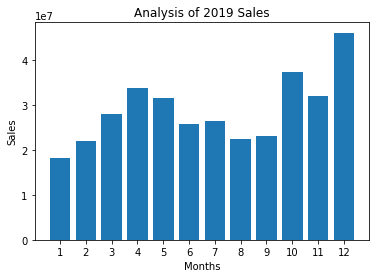

In [14]:
#plt.style.use('fivethirtyeight')
Month=range(1,13)
plt.bar(Month,all_data.groupby('Month')['Sales'].sum())
plt.xticks(Month)
plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Analysis of 2019 Sales')

# Problem Statement 1 :Finding the city that have maximum order.

In [15]:
all_data.head()
'380 North St, Los Angeles, CA 90001'.split(',')[1]
def city(x):
    return x.split(',')[1]
all_data['city']=all_data['Purchase Address'].apply(city)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90,Austin
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta


Text(0.5, 1.0, 'Analysis of City having maximum order')

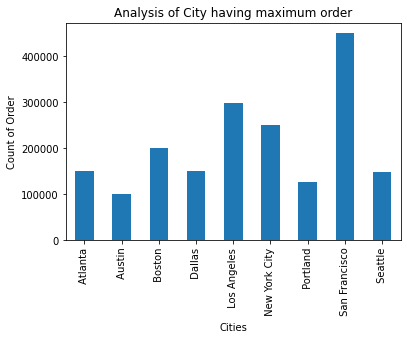

In [16]:
all_data.groupby('city')['city'].count().plot.bar()
plt.xlabel('Cities')
plt.ylabel('Count of Order')
plt.title('Analysis of City having maximum order')

# Problem Statement 2 :Finding the time at which sales of product purchase is maximum.

In [17]:
all_data.dtypes
all_data['Hour']=pd.to_datetime(all_data['Order Date']).dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,Hour
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles,14
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90,Austin,10
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles,17
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle,7
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta,19


Text(0.5, 1.0, 'Analysis of maximum sales(Hour Analysis)')

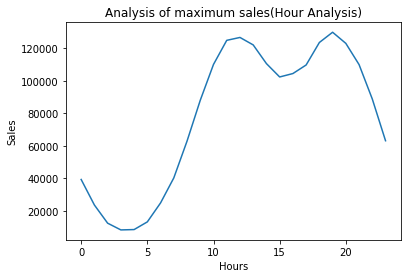

In [18]:
key=[]
hour=[]
for keys,hour_df in all_data.groupby('Hour'):
    key.append(keys)
    hour.append(len(hour_df))

plt.plot(key,hour)
plt.xlabel('Hours')
plt.ylabel('Sales')
plt.title('Analysis of maximum sales(Hour Analysis)')

# Problem Statement 3 :Find the product that is being sold the most and find the reason why it is being sold most.


<AxesSubplot:xlabel='Product'>

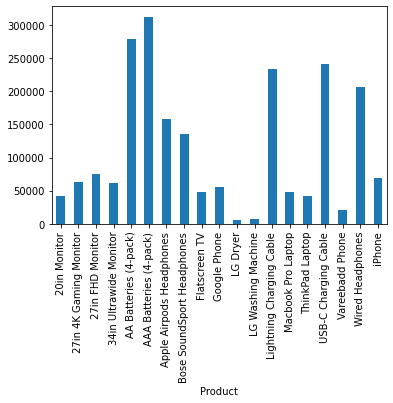

In [19]:
all_data.head()
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

<ipython-input-20-473d45565c5c>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Products, rotation='vertical', size=8)


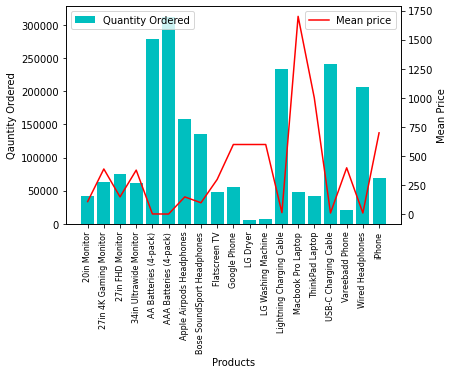

In [20]:
all_data.groupby('Product')['Price Each'].mean()
Products=all_data.groupby('Product')['Quantity Ordered'].sum().index
Quantity=all_data.groupby('Product')['Quantity Ordered'].sum()
Prices=all_data.groupby('Product')['Price Each'].mean()
fig,(ax1)=plt.subplots()
ax2=ax1.twinx()
ax1.bar(Products,Quantity,color='c', label='Quantity Ordered')
ax2.plot(Products,Prices,color='r', label='Mean price')
ax1.set_xticklabels(Products, rotation='vertical', size=8)
ax1.set_ylabel("Qauntity Ordered")
ax2.set_ylabel("Mean Price")
ax1.set_xlabel("Products")
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


# Problem Statement 4 :What product are most often sold together

In [21]:
df=all_data['Order ID'].duplicated(keep=False)
df2=all_data[df]
df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,Hour
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles,14
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301",9,23.90,Austin,10
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles,17
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle,7
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta,19


<AxesSubplot:>

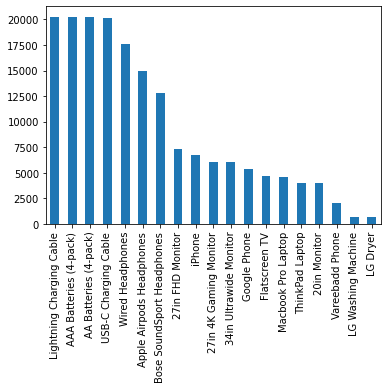

In [24]:
df2['Grouped']=df2.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df2=df2.drop_duplicates(subset=['Order ID'])
df2.head()
df2['Grouped'].value_counts().plot.bar()